# SSMNet

Use [SSMNet](https://arxiv.org/pdf/2309.02243.pdf) to generate a novelty-curve from audio and chunk the sounds based on that.

In [5]:
import os
import yaml
from ssmnet.core import SsmNetDeploy

In [6]:
with open(
    os.path.join("ssmnet", "weights_deploy", "config_example.yaml"),
    "r",
    encoding="utf-8",
) as fid:
    config_d = yaml.safe_load(fid)
audio_file = os.path.join("data", "moonlight_sonata.wav")
ssmnet_deploy = SsmNetDeploy(config_d)

In [7]:
# get the audio features patches
feat_3m, time_sec_v = ssmnet_deploy.m_get_features(audio_file)
# process through SSMNet to get the Self-Similarity-Matrix and Novelty-Curve
ssm_net, hat_novelty_np = ssmnet_deploy.m_get_ssm_novelty(feat_3m, True)
hat_boundary_sec_v, hat_boundary_frame_v = ssmnet_deploy.m_get_boundaries(hat_novelty_np, time_sec_v)

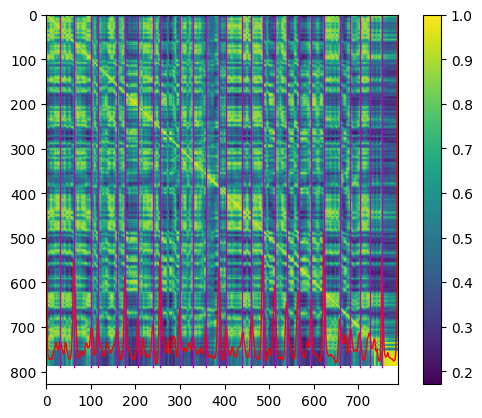

In [8]:
ssmnet_deploy.m_plot(ssm_net, hat_novelty_np, hat_boundary_frame_v, "tmp.pdf")

In [38]:
import librosa
import numpy as np
# from ssm_utils import boundary_split

def boundary_split(array, indices) :
  """mostly chatgpt-generated"""
  # Check if the indices are valid
  if any(index < 0 or index >= len(array) for index in indices):
    raise ValueError("Invalid index in the list.")

  # Add the start and end indices to the list
  split_indices = [0] + sorted(indices) + [len(array)]

  # Create subarrays using slicing
  subarrays = [
    array[int(split_indices[i]) : int(split_indices[i + 1])] 
    for i in range(len(split_indices) - 1)
  ]

  return subarrays

audio, sr = librosa.load(audio_file)
audio = np.expand_dims(audio, 1)
chunk_indices = np.round(np.asarray(hat_boundary_sec_v) * sr)

(359424, 1)


In [ ]:
chunked_audio = boundary_split(audio, chunk_indices)
chunked_audio.pop(0)
start = chunked_audio.pop(0)
sims = []

for chunk in chunked_audio:
  if len(chunk) < 1:
    continue

  print(chunk)
  sims.append(librosa.segment.cross_similarity(chunk, start))
  